In [ ]:
import cv2
import numpy as np
import os
from google.colab import files
from google.colab.patches import cv2_imshow

In [ ]:
cap = cv2.VideoCapture('/content/drive/MyDrive/Hand Video2.mov')

frames =[]
frame_num = 0
while(cap.isOpened()):
  ret, frame = cap.read()
  if not ret: break
  frames.append(frame)
  frame_num += 1
  if frame_num >= 100: break # 원하는 frame 길이 만큼 설정

height, width = len(frames[0]),len(frames[0][0])
video=cv2.VideoWriter('video.avi',-1,1,(width,height))
kernel = np.ones((11, 11), np.uint8) 

for i in range(frame_num):
  frames[i] = cv2.GaussianBlur(frames[i],(5,5),cv2.BORDER_DEFAULT)
  filtered_hsv = cv2.cvtColor(frames[i], cv2.COLOR_BGR2HSV)
  mask = cv2.inRange(filtered_hsv, (0, 0, 0), (360, 220, 360))

 # s 220 ~230v 0 190
  imask = mask > 0
  thres = np.zeros((height, width), np.uint8)
  thres[imask] = 255
  # close => 구멍 매꾸기
  thres = cv2.morphologyEx(thres, cv2.MORPH_CLOSE, kernel)
  output = cv2.connectedComponentsWithStats(thres,connectivity = 4)
  num_labels=output[0]
  stats = output[2]
  print(i)
  cv2_imshow(thres)
  for j in range(1,num_labels):
    cv2.rectangle(frames[i],(stats[j,cv2.CC_STAT_LEFT],stats[j,cv2.cv2.CC_STAT_TOP]),(stats[j,cv2.CC_STAT_LEFT]+stats[j,cv2.CC_STAT_WIDTH] ,stats[j,cv2.CC_STAT_TOP]+stats[j,cv2.CC_STAT_HEIGHT ]),(0,0,255),3)
  cv2_imshow(frames[i])
  video.write(frames[i])
cv2.destroyAllWindows()
video.release()

Output hidden; open in https://colab.research.google.com to view.

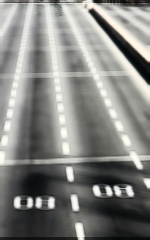

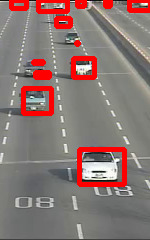

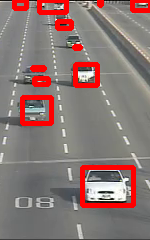

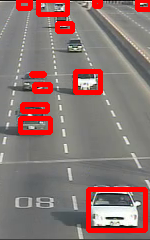

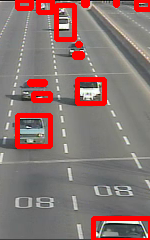

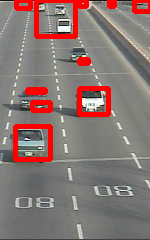

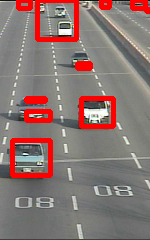

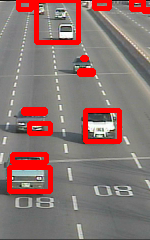

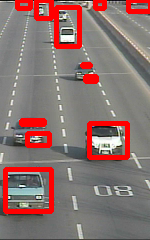

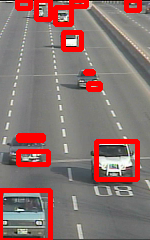

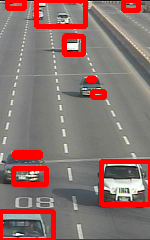

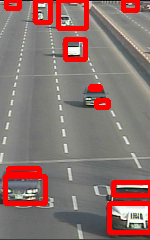

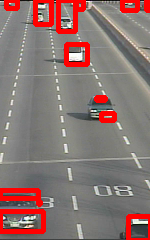

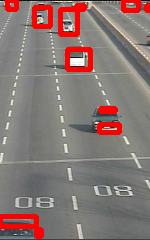

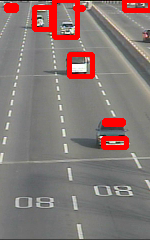

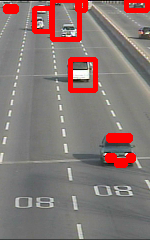

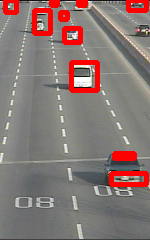

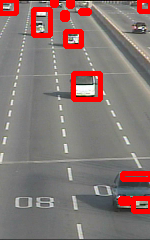

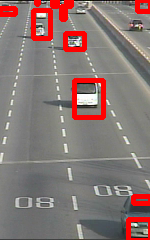

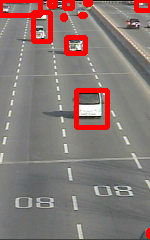

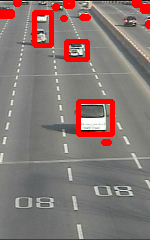

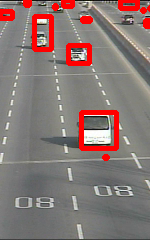

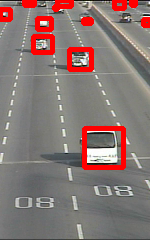

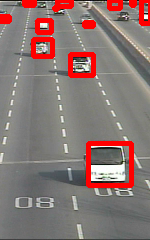

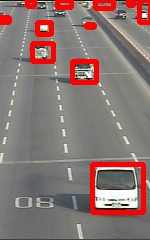

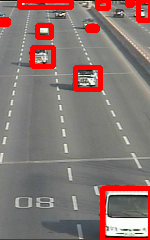

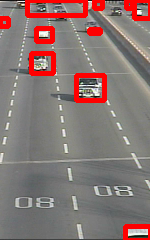

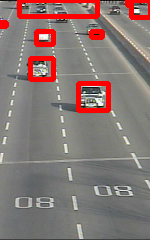

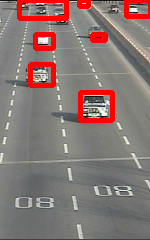

In [ ]:
cap = cv2.VideoCapture('/content/drive/MyDrive/Project_outdoor_video1.mov')

frames =[]
frame_num = 0
while(cap.isOpened()):
  ret, frame = cap.read()
  if not ret: break
  frame = frame[:,150:300,:] # roi
  frames.append(frame)
  frame_num += 1
  if frame_num >= 100: break # 원하는 frame 길이 만큼 설정

height, width = len(frames[0]),len(frames[0][0])
pre_frames = np.zeros_like(frames,np.uint8)
video=cv2.VideoWriter('video.avi',-1,1,(width,height))
for i in range(frame_num):
  pre_frames[i] = cv2.GaussianBlur(frames[i],(5,5),cv2.BORDER_DEFAULT)
  # convert from RGB color-space to YCrCb
  ycrcb_img = cv2.cvtColor(pre_frames[i], cv2.COLOR_BGR2YCrCb)
  # equalize the histogram of the Y channel
  ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0])
  # convert back to RGB color-space from YCrCb
  pre_frames[i] = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)


bg = np.median(pre_frames, axis=0).astype(dtype=np.uint8)
cv2_imshow(bg)
# op1 and op2
for i in range(frame_num):

  thres = np.zeros((height, width), np.uint8)
  threshold1 = 20
  mask1 = cv2.subtract(pre_frames[i],bg) > threshold1
  mask1 = mask1.any(axis=2)
  
  threshold2 = -5
  mask2 = cv2.absdiff(pre_frames[i],pre_frames[i-1]) > threshold2
  mask2 = mask2.any(axis=2)

  mask = np.logical_and(mask1,mask2)
  thres[mask] = 255
  
  kernel = np.ones((2,2), np.uint8)
  thres = cv2.morphologyEx(thres,cv2.MORPH_OPEN,kernel)
  
  kernel = np.ones((4,4), np.uint8)
  thres = cv2.morphologyEx(thres,cv2.MORPH_CLOSE,kernel,iterations=2)
  output = cv2.connectedComponentsWithStats(thres,connectivity = 4)
  num_labels=output[0]
  stats = output[2]

  for j in range(1,num_labels):
     cv2.rectangle(frames[i],(stats[j,cv2.CC_STAT_LEFT],stats[j,cv2.cv2.CC_STAT_TOP]),(stats[j,cv2.CC_STAT_LEFT]+stats[j,cv2.CC_STAT_WIDTH] ,stats[j,cv2.CC_STAT_TOP]+stats[j,cv2.CC_STAT_HEIGHT ]),(0,0,255),3)
  cv2_imshow(frames[i])
  video.write(frames[i])
cv2.destroyAllWindows()
video.release()